# **Evaluación Profunda:** 
Analizaremos el rendimiento del modelo final utilizando métricas detalladas y visualizaciones como la matriz de confusión, conectando los resultados con el problema de negocio.


In [1]:
# Importar librerías estándar
import sys
import os

# 2. Configurar la ruta para que Python encuentre el código en 'src'. Esto añade la carpeta raíz del proyecto al sys.path
ruta_raiz_proyecto = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.append(ruta_raiz_proyecto)

# 3. Importar las funciones directamente.
from src.cargar_analisis import cargar_dataframe, crear_listas_variables
from src.pipelines import preparar_datos_para_modelado
from src.evaluar_modelos import evaluar_mejor_modelo, cargar_artefactos_ml

print("Funciones importadas exitosamente desde src/")

Funciones importadas exitosamente desde src/


# **2.- Importar datos**

In [2]:
# Ruta de la base de datos
path_data = '../../data/obesity_estimation_model.csv'

# Ejecutar función para cargar datos
df = cargar_dataframe(path_data)

# Ejecutar la función para generar listas con las variables numericas, categoricas y objetivo
variables_numericas, variables_categoricas, variable_objetivo = crear_listas_variables(to_lower = 1, exclude_mixed = 1)

Archivo CSV cargado exitosamente desde: ../../data/obesity_estimation_model.csv


# **3. Preprocesamiento con Pipelines**

In [3]:
X_train, X_test, y_train, y_test, preprocesador = preparar_datos_para_modelado(df, variable_objetivo, 0.2, 1)

Iniciando la preparación de datos para el modelado...
Datos divididos: 1556 para entrenamiento, 390 para prueba.

Preprocesador creado y ajustado a los datos de entrenamiento exitosamente.


# **4.- Importar los mejores modelos**

In [6]:
# Crgar artefactos
df_resultados_opt, pipelines_optimizados = cargar_artefactos_ml(base_path='../../artefactos/')
pipelines_optimizados['Random Forest'] 

Resultados cargados desde: ../../artefactos/mejores_modelos.csv
Pipelines cargados desde: ../../artefactos/pipelines_optimizados.joblib


Pipeline(steps=[('preprocesador',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2o', 'faf', 'tue', 'imc'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['gender', 'family_history_with_overweight', 'favc', 'caec', 'smoke',
       'scc', 'calc', 'mtrans'],
      dtype='object'))])),
                ('clasificador',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_estimators=200, random_state=11))])

# **5.- Evaluar modelos**

El mejor modelo seleccionado es: XGBoost

--- Reporte de Clasificación Final para: XGBoost ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        52
           2       0.96      0.98      0.97        55
           3       0.94      0.92      0.93        52
           4       0.91      0.95      0.93        64
           5       0.98      0.98      0.98        57
           6       1.00      0.95      0.97        60

    accuracy                           0.97       390
   macro avg       0.97      0.97      0.97       390
weighted avg       0.97      0.97      0.97       390


--- Matriz de Confusión ---


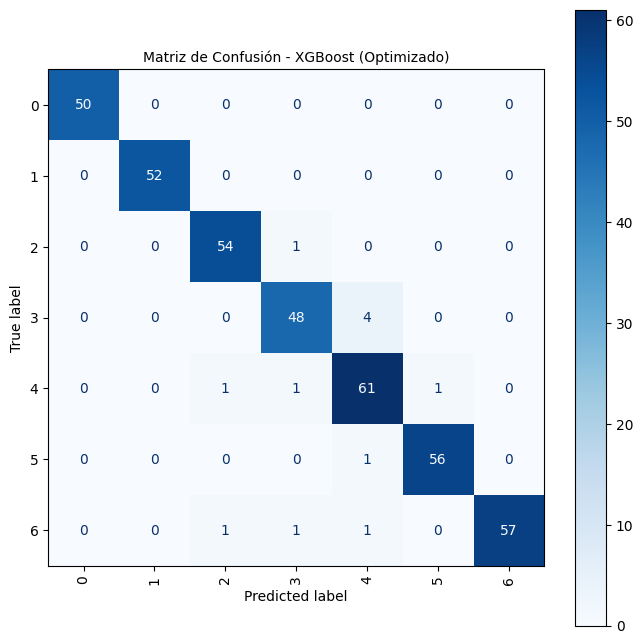

In [7]:
# Llamar a la función para evalaur el modelo
mejor_modelo = evaluar_mejor_modelo(
    df_resultados=df_resultados_opt,
    pipelines=pipelines_optimizados,
    X_test=X_test,
    y_test=y_test
)